# FS7T04 CZ1015 Modelling Earthquake Damage
## Part 2
In this part we will train machine learning algorithms to predict the damage grade of the buildings and solve the problem statements related to finding the 'ideal' building materials and contruct your own building.

# Training the dataset using different models

In [21]:
#importing essential libraries
import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sb
sb.set()
import matplotlib.pyplot as plt

# for decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

# importing GridSearchCV to identify the best parameters
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# importing libraries for splitting datatset
from sklearn.model_selection import train_test_split

# importing libraries for RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import KFold, cross_val_score

# importing libraries for GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier

# importing libraries for XGBoost CLassifier
from xgboost import XGBClassifier

In [2]:
# Importing the data from the files
train_values=pd.read_csv('train_values.csv')
train_labels=pd.read_csv('train_labels.csv')
train_values=train_values.drop('building_id',axis=1)
train_labels=train_labels.drop('building_id',axis=1)

test_values=pd.read_csv('test_values.csv')
test_values=test_values.drop('building_id',axis=1)

In [3]:
train_values.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,6,487,12198,2,30,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
1,8,900,2812,2,10,8,7,o,r,n,...,0,0,0,0,0,0,0,0,0,0
2,21,363,8973,2,10,5,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
3,22,418,10694,2,10,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
4,11,131,1488,3,30,8,9,t,r,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_labels.head()

,damage_grade
0,3
1,2
2,3
3,2
4,3


In [5]:
# setting damage_grade as Response
Y = pd.DataFrame(train_labels)

# setting all columns of train_values as Predictors
X = pd.DataFrame(train_values)

# get dummies
X = pd.get_dummies(X)

# Split the Dataset into Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [6]:
print('Training dataset :', X_train.shape)
print('Test dataset:', X_test.shape)

Training dataset : (208480, 68)
Test dataset: (52121, 68)


## Using multivariate decision tree - Garg Astha 

In [7]:
dectree = DecisionTreeClassifier(max_depth = 6)  
dectree.fit(X_train,Y_train)
y_pred = dectree.predict(X_test)

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6577387233552695



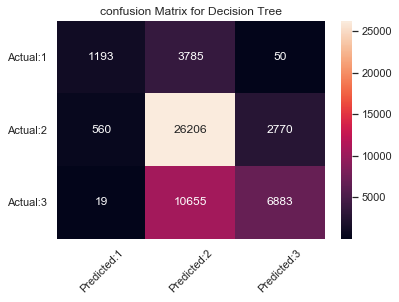

In [8]:
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, Y_test))
print()

# Plot the Confusion Matrix
cm=confusion_matrix(Y_test, y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:1','Predicted:2','Predicted:3'],
                                         index=['Actual:1','Actual:2','Actual:3'])
                                                                            
plt.figure(figsize = (6,4))
sb.heatmap(conf_matrix, annot=True,fmt='d')
plt.title("confusion Matrix for Decision Tree")
plt.xticks(rotation=45)
plt.yticks(rotation=360)
plt.show()

In [9]:
print("classification report for Decision tree :\n\n",metrics.classification_report(Y_test, y_pred))

classification report for Decision tree :

               precision    recall  f1-score   support

           1       0.67      0.24      0.35      5028
           2       0.64      0.89      0.75     29536
           3       0.71      0.39      0.50     17557

    accuracy                           0.66     52121
   macro avg       0.68      0.51      0.53     52121
weighted avg       0.67      0.66      0.63     52121



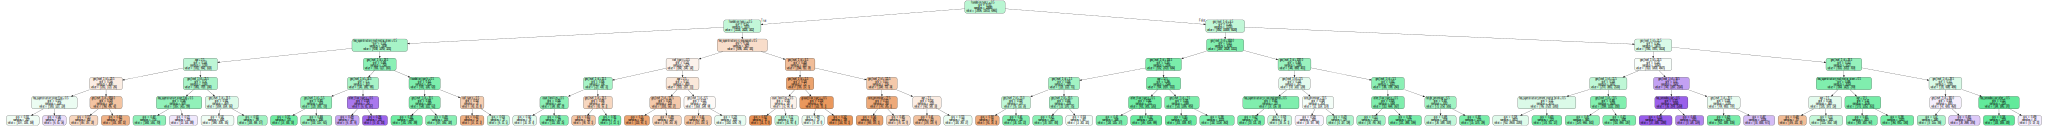

In [10]:
# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_test.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

## Using ensemble methods
As it can be seen that the dataset is quite large woth many features, using the usual machine learning algorithms take a long duration to compute. Thus, we will now use ensemble methods to improve efficiency and accuracy.

## Using RandomForestClassifier - Garg Astha
This method creates bootstrapped datatset from subset of columns of the main datatset to create multiple decision trees. The final class is decided by majority voting.

In [11]:
rf = RandomForestClassifier(n_estimators = 150) # with 150 trees
rf.fit(X_train,Y_train)
rf_pred=rf.predict(X_test)
# print the accuracy
print("Accuracy:",metrics.accuracy_score(Y_test, rf_pred))
print(" \n")

C:\Users\rgarg\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy: 0.7132058095585273
 



In [12]:
print("classification report for Random Forest :\n\n",metrics.classification_report(Y_test, rf_pred))

classification report for Random Forest :

               precision    recall  f1-score   support

           1       0.64      0.46      0.54      5028
           2       0.72      0.83      0.77     29536
           3       0.72      0.59      0.65     17557

    accuracy                           0.71     52121
   macro avg       0.69      0.63      0.65     52121
weighted avg       0.71      0.71      0.71     52121



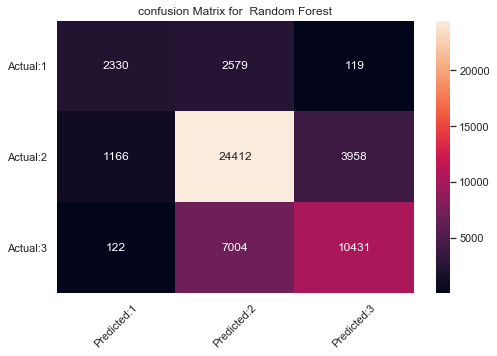

In [13]:
# Plot the Confusion Matrix
cm=confusion_matrix(Y_test, rf_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:1','Predicted:2','Predicted:3'],
                                         index=['Actual:1','Actual:2','Actual:3'])
                                                                            
plt.figure(figsize = (8,5))
sb.heatmap(conf_matrix, annot=True,fmt='d')
plt.title("confusion Matrix for  Random Forest")
plt.xticks(rotation=45)
plt.yticks(rotation=360)
plt.show()

## Using GradientBoostingClassifier - Garg Astha

This is a type of Boosting Ensemble method. It creates decision trees sequentially and focuses on reducing error in the following steps. Thus, it lays emphasis on correctly classifying the misclassified values.

In [14]:
GBC=GradientBoostingClassifier(n_estimators=100)
GBC.fit(X_train,Y_train)
GBC_pred=GBC.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, GBC_pred))
print(" \n")
print("classification report for Gradient Boosting :\n\n",metrics.classification_report(Y_test, GBC_pred))

C:\Users\rgarg\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.6823545212102607
 

classification report for Gradient Boosting :

               precision    recall  f1-score   support

           1       0.63      0.37      0.47      5028
           2       0.67      0.86      0.76     29536
           3       0.73      0.47      0.57     17557

    accuracy                           0.68     52121
   macro avg       0.68      0.57      0.60     52121
weighted avg       0.69      0.68      0.67     52121



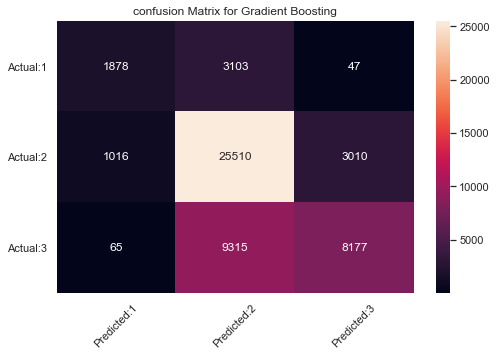

In [15]:
# Plot the Confusion Matrix
cm=confusion_matrix(Y_test, GBC_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:1','Predicted:2','Predicted:3'],
                                         index=['Actual:1','Actual:2','Actual:3'])
                                                                            
plt.figure(figsize = (8,5))
sb.heatmap(conf_matrix, annot=True,fmt='d')
plt.title("confusion Matrix for Gradient Boosting")
plt.xticks(rotation=45)
plt.yticks(rotation=360)
plt.show()

## Using XGBClassifier - Garg Astha and Stanley

This literally means extreme gradient boosting classifier. It is an efficient model.

In [16]:
XGB = XGBClassifier(nthread=4)

In [17]:
XGB.fit(X_train,Y_train)
XGB_pred=XGB.predict(X_test)
metrics.accuracy_score(Y_test, XGB_pred)

C:\Users\rgarg\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rgarg\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.672895761785077

In [18]:
print(metrics.classification_report(Y_test, XGB_pred))

              precision    recall  f1-score   support

           1       0.62      0.36      0.46      5028
           2       0.66      0.88      0.75     29536
           3       0.74      0.41      0.53     17557

    accuracy                           0.67     52121
   macro avg       0.67      0.55      0.58     52121
weighted avg       0.68      0.67      0.65     52121



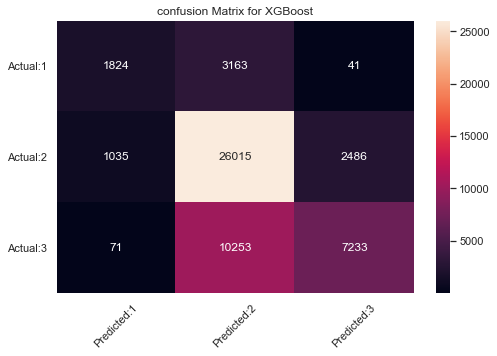

In [19]:
# Plot the Confusion Matrix
cm=confusion_matrix(Y_test, XGB_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:1','Predicted:2','Predicted:3'],
                                         index=['Actual:1','Actual:2','Actual:3'])
                                                                            
plt.figure(figsize = (8,5))
sb.heatmap(conf_matrix, annot=True,fmt='d')
plt.title("confusion Matrix for XGBoost")
plt.xticks(rotation=45)
plt.yticks(rotation=360)
plt.show()

### Since XGB CLassifier needs parameter tuning to obtain best results, we used GridSearchCV to obtain an optimal value of the parameters in order to prevent overfitting of data
With the defualt values of the parameters, the accuracy is same as GradientBoostingClassifier however, the speed is much faster as it is more optimized and efficient.

## Using GridSearchCV to obtain the optimal value of the parameters - Stanley

In [22]:
model = XGBClassifier(nthread=4)
parameters = {'nthread':[4], 
              'objective':['binary:logistic'],
              'learning_rate': [0.1],
              'max_depth': [6],
              'min_child_weight': [6],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [1000],
              'missing':[-999],
              'seed': [1337]}

clf = GridSearchCV(model, parameters, n_jobs=5, 
                   cv=StratifiedKFold(n_splits=5, shuffle=True),
                   verbose=2, refit=True)
clf.fit(X_train,Y_train.values.ravel())

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed: 25.7min remaining: 38.5min
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed: 26.6min remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed: 26.6min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=4, objective='binary:logi...
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=5,
             param_grid={'colsample_bytree': [0.7], 'learning_rate': [0.1],
                         'max_depth': [6], 'min_child_weight': [6],
                         'missing': [-999], 'n_estimators': [1000],
                         'nthread': [4], 'objective': ['binary:

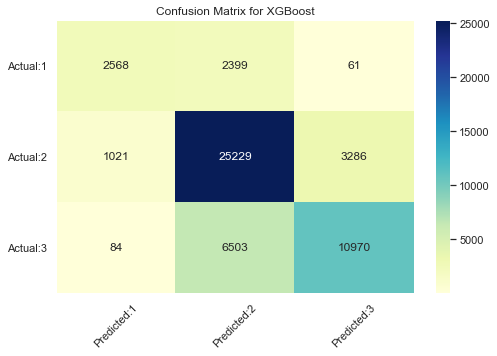

In [23]:
XGBoost_y_pred = clf.best_estimator_.predict(X_test)
cm=confusion_matrix(Y_test.values.ravel(),XGBoost_y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:1','Predicted:2','Predicted:3'],
                                         index=['Actual:1','Actual:2','Actual:3'])
                                                                            
plt.figure(figsize = (8,5))
sb.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.title("Confusion Matrix for XGBoost")
plt.xticks(rotation=45)
plt.yticks(rotation=360)
plt.show()

In [26]:
print("Accuracy:",metrics.accuracy_score(Y_test, XGBoost_y_pred))
print(" \n")
print("classification report for Gradient Boosting :\n\n",metrics.classification_report(Y_test, XGBoost_y_pred))

Accuracy: 0.7437884921624681
 

classification report for Gradient Boosting :

               precision    recall  f1-score   support

           1       0.70      0.51      0.59      5028
           2       0.74      0.85      0.79     29536
           3       0.77      0.62      0.69     17557

    accuracy                           0.74     52121
   macro avg       0.73      0.66      0.69     52121
weighted avg       0.74      0.74      0.74     52121



In [28]:
clf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=6, missing=-999, n_estimators=1000, n_jobs=1,
              nthread=4, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=1337,
              silent=1, subsample=0.8, verbosity=1)

### It is clear that there has been a significant increase in the overall accuracy of the model

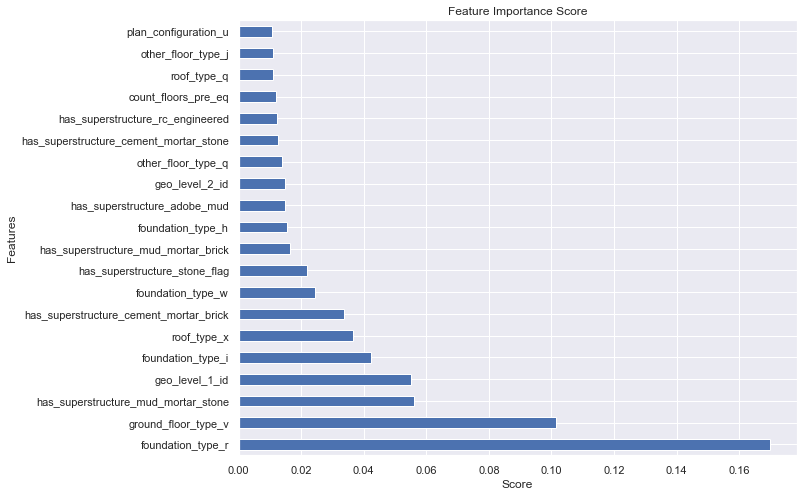

In [27]:
pd.Series(clf.best_estimator_.feature_importances_,index=X_train.columns).sort_values(ascending=False)

# Horizontal bar chart for feature Importance
feat_importances = pd.Series(clf.best_estimator_.feature_importances_,index= X_train.columns)
feat_importances = feat_importances.nlargest(20)
plt.figure(figsize=(10,8))
feat_importances.plot(kind='barh')
plt.xlabel('Score')
plt.ylabel('Features')
plt.title('Feature Importance Score')

plt.show();

# Let us now see which category of the features related to materials suffered least damage and thus identify the 'ideal' materials - Garg Astha

We will do this by counting number of buildings that suffered a specific damage grade

In [30]:
df=pd.read_csv('train_values.csv')
lab=pd.read_csv('train_labels.csv')
df['damage_grade']=lab['damage_grade']
all_columns = list(df)
numerical_columns = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'age', 'area_percentage', 'height_percentage','count_families', 'count_floors_pre_eq']
categorical_columns = [col for col in all_columns if col not in numerical_columns and col != "building_id"]
for feat in categorical_columns:
    grouped = df.groupby(feat)
    print(grouped['damage_grade'].agg([np.sum, np.mean, np.std]))

                           sum      mean       std
land_surface_condition                            
n                        79988  2.251407  0.576279
o                        19036  2.289081  0.591892
t                       484272  2.234170  0.618073
                    sum      mean       std
foundation_type                            
h                  3049  2.105663  0.767711
i                 15375  1.453351  0.538175
r                510633  2.329573  0.564595
u                 26861  1.883661  0.622530
w                 27378  1.810954  0.592544
              sum      mean       std
roof_type                            
n          414985  2.269637  0.587467
q          142867  2.320173  0.587525
x           25444  1.572267  0.578699
                      sum      mean       std
ground_floor_type                            
f                  484032  2.309104  0.576694
m                    1001  1.970472  0.569711
v                   40190  1.634205  0.582049
x                

We can compile the above imformation, to understand what category of features result in least damage. Thus, using these materials irrespective of the geographical location of the building would suffer least damage.

land_surface_condition = t

foundation_type = i

roof_type = x

ground_floor_type = v

other_floor_type = s

position = j

plan_configuration = c

has_superstructure = cement_mortar_brick / rc_engineered


### Considering the above features to be ideal, let us train a model only considering the materials and structure and predict the damage_grade for this "ideal" case

In [31]:
columns=['land_surface_condition',
                      'foundation_type',
                       'roof_type',
                       'ground_floor_type',
                     'other_floor_type',
                     "has_superstructure_adobe_mud",
                     'has_superstructure_mud_mortar_stone',
                     'has_superstructure_stone_flag',
                      'has_superstructure_cement_mortar_stone',
                      'has_superstructure_mud_mortar_brick',
                      'has_superstructure_cement_mortar_brick',
                    'has_superstructure_timber',
                    'has_superstructure_bamboo',
                      'has_superstructure_rc_non_engineered',
                      'has_superstructure_rc_engineered',
                      'has_superstructure_other']
train = df[columns].copy()
train=pd.get_dummies(train)
train.head()

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,...,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x
0,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [32]:
damage_grade=df['damage_grade']

In [33]:
X_train, X_test,Y_train, Y_test = train_test_split(train,damage_grade,test_size = 0.20)
model = clf.best_estimator_
model.fit(X_train,Y_train)
pred=model.predict(X_test)
metrics.accuracy_score(Y_test, pred)

0.590932637516548

In [34]:
array = np.zeros(shape=(1,31))

In [35]:
ideal=pd.DataFrame(array,columns =train.columns )
ideal['land_surface_condition_t']=1
ideal['foundation_type_i']=1
ideal['roof_type_x']=1
ideal['ground_floor_type_x']=1
ideal['other_floor_type_s']=1
ideal['has_superstructure_cement_mortar_brick']=1
ideal['has_superstructure_rc_engineered']=1
ideal.head()     

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,...,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x
0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,1,...,1,0.0,0.0,0.0,1,0.0,0.0,0.0,1,0.0


In [36]:
pred_ideal=model.predict(ideal)
pred_ideal

array([1], dtype=int64)

### Hence, it is clear that using the identified materials can increase the probability of the building in sustaining least damage in an unfortunate event of earthquake.

# Construct your own building - Garg Astha

Extending the knowledge obtained above, we can predict the damage that will be suffered by the user's  building depending on the type of materials used in the construction

In [37]:
print("Let us predict the damage grade of your building in case of earthquake \n")
print("--------------------------------------------------------------------- \n")
print("Enter the details according to the instruction provided \n")
print("--------------------------------------------------------------------- \n")
a=input("Enter land surface condition- n,o,t \n")
print("--------------------------------------------------------------------- \n")
b=input("Enter type of foundation- h,i,r,u,w \n")
print("--------------------------------------------------------------------- \n")
c=input("Enter roof type -n,q,x \n")
print("--------------------------------------------------------------------- \n")
d=input("Enter ground floor type -f,m,v,x,z \n")
print("--------------------------------------------------------------------- \n")
e=input("Enter other floor type -j,q,s,x \n")
print("--------------------------------------------------------------------- \n")
f=input("Enter type of superstructure - 0 for adobe_mud, 1 for mud_mortar_stone, 2 for stone_flag, 3 for cement_mortar_stone, \
         4 for mud_mortar_brick, 5 for cement_mortar_brick,6 for timber, 7 for bamboo and 8 for others \n")
print("--------------------------------------------------------------------- \n")
g=input("Is the superstructure rc engineered? 0 for False, 1 for True")
print("--------------------------------------------------------------------- \n")


Let us predict the damage grade of your building in case of earthquake 

--------------------------------------------------------------------- 

Enter the details according to the instruction provided 

--------------------------------------------------------------------- 

Enter land surface condition- n,o,t 
n
--------------------------------------------------------------------- 

Enter type of foundation- h,i,r,u,w 
i
--------------------------------------------------------------------- 

Enter roof type -n,q,x 
q
--------------------------------------------------------------------- 

Enter ground floor type -f,m,v,x,z 
m
--------------------------------------------------------------------- 

Enter other floor type -j,q,s,x 
q
--------------------------------------------------------------------- 

Enter type of superstructure - 0 for adobe_mud, 1 for mud_mortar_stone, 2 for stone_flag, 3 for cement_mortar_stone,          4 for mud_mortar_brick, 5 for cement_mortar_brick,6 for timber

### Using the knowledge of the 'ideal' materials obtained above, we will use the same trained model to predict the damage grade

In [38]:
new_build=pd.DataFrame(array,columns =train.columns )
new_build['land_surface_condition_'+a]=1
new_build['foundation_type_'+b]=1
new_build['roof_type_'+c]=1
new_build['ground_floor_type_'+d]=1
new_build['other_floor_type_'+e]=1
new_build['has_superstructure_adobe_mud']=0 if (f==1) else 1
new_build['has_superstructure_mud_mortar_stone']=1 if (f==1) else 0
new_build['has_superstructure_stone_flag']=1 if (f==2) else 0
new_build['has_superstructure_cement_mortar_stone']=1 if (f==3) else 0
new_build['has_superstructure_mud_mortar_brick']=1 if (f==4) else 0
new_build['has_superstructure_cement_mortar_brick']=1 if (f==5) else 0
new_build['has_superstructure_timber']=1 if (f==6) else 0
new_build['has_superstructure_bamboo']=1 if (f==7) else 0
new_build['has_superstructure_rc_non_engineered']=1 if (g==0) else 0
new_build['has_superstructure_rc_engineered']=1 if (g==1) else 0
new_build['has_superstructure_other']=1 if (f==8) else 0
new_build.head()
pred_damage=model.predict(new_build)

In [39]:
pred_damage

array([2], dtype=int64)

# Conclusion
Thus, we have been able to find a solution to all our problem statements.
1. We indentified the importance of features.
2. We predicted the damage grade and XGBoost Classifier with tuned parameters proved to be the best model.
3. We identified the ideal materials that suffer least damage from earthquake and also those geographical areas with least damaged buildings.
4. We used the model trained earlier to predict damage of the user's building.